# QP-1A : Single photon interferometer, IBM QC Hardware calculation

 - Name : **Jayant Som**
 
 - Contact : **jsom@buffalo.edu | 716-348-7708**

**_______________________________________________________________________________________________________________**

### Single Photon Interferometer with the single photon incident HORIZONTALLY (in |0> state)

#### i) Imports :

In [14]:
# Importing the QiskitRuntimeService class from qiskit_ibm_runtime module
# The QiskitRuntimeService class is used to connect to IBMQ Services 
# and run actual IBM QC hardware

# Importing the SamplerV2 class from qiskit_ibm_runtime module
# The SamplerV2 class is used to find the probabilities of output states
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# Importing the QuantumCircuit class from Qiskit
# The QuantumCircuit class is used to create quantum circuits
from qiskit import QuantumCircuit

# Importing the numpy library
# Numpy is used for working with arrays and perform numerical operations
import numpy as np

# I am importing the transpile function from the qiskit library
# Transpile function is required to ensure that my circuit 
# is able to run on the simulator.
from qiskit import transpile

# Importing the plot_histogram function from qiskit 
# It used to visualize the simulation result.
from qiskit.visualization import plot_histogram

#### ii) Saving IBM QC Instance in local

In [15]:
# The save_account function is used to save my IBMQ account credentials
# channel is service provided by IBM QC
# instance denotes the specific IBM QC instance which I want to use 
# The instance avaialble by default is 'open',
# so I am selecting the 'open/main' instance
# token is the IBMQ API token for my account
# set_as_default = True is used to make my account default 
# for all future runs.
# overwrite = True is used to replace any existing account information

# I have commented out this line of code 
# beacuse my account credentials are already saved in my local

#QiskitRuntimeService.save_account(channel='ibm_quantum', 
#instance='ibm-q/open/main',
#token='paste_my_token',
#set_as_default=True, overwrite=True)

#### iii) Loading credentials and checking the available hardware 

In [16]:
# I am creating a new object of QiskitRuntimeService
# I am assigning this object to the variable named 'service' 
# It is used to connect with my IBMQ account and use the sevices
service = QiskitRuntimeService() 

# backends method is used to fetch list of all available quantum backends
# operational = True : It is used to find the backends currently available
# simulator = False : This is used to exclude simulators
# min_num_qubits = 5 : This is used to select only those hardware 
# which has at least 5 qubits
mybackends = service.backends(operational = True, simulator = False, 
                              min_num_qubits = 5)
mybackends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

***There are 3 available backends at the time of running this code***

#### iv) Selecting least busy hardware

In [17]:
# least_busy method is used to pick the best available backend
# which satisfies the following criteria : 
# operational = True -> the backends currently available
# simulator = False -> excluding simulators
# min_num_qubits = 5 -> select only that hardware which has at least 5 qubits
device = service.least_busy(operational = True, simulator = False, 
                            min_num_qubits = 5) 
device 

<IBMBackend('ibm_sherbrooke')>

***The sherbrooke backend is selected as it matches all the filter conditions***

#### v) Quantum Circuit creation : Horizontal : |0> is the default input state

In [18]:
# My Circuit will use 1 qubit and 1 classical bit
# So parameterizing the value to use it in all places
n = 1

# I am creating a new object of the QuantumCircuit class 
# I am assigning this object to the variable named 'circuit' 
# The QuantumCircuit constructor takes 2 arguments: (Qubits, Classical bits)
# In my circuit, parameter n = 1, so 1 qubit and 1 classical bit is there
circuit = QuantumCircuit(n, n)

# 1st Beam splitter:
# I am applying a rotation gate Rx around the x-axis by -π/2 rad to qubit 0.
# The rx method takes 2 arguments (angle of rotation, qubit index)
# The angle of rotation is -90° = -π/2 rad. Numpy computes this value.
# The rx gate is applied on the first index qubit 0
circuit.rx(-np.pi/2, 0)

# Mirror : 
# I am applying an X gate on the first index qubit 0.
# This X gate is equivalent to NOT gate which reverses the qubit state.
circuit.x(0)

# 2nd Beam splitter : 
# I am applying another rotation gate Rx 
# around the x-axis by -π/2 rad to qubit 0.
circuit.rx(-np.pi/2, 0)

#### vi) Measurement and circuit diagram :

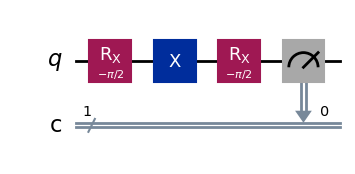

In [19]:
# The measure method is used to measure qubit 
# and store the result in classical bit.
# It takes 2 arguments (qubits, classical bits)
# I am measuring the single qubit index 0
# I am storing the result in single classical bit 0
circuit.measure([0], [0])

# The draw method is used to visualize the quantum circuit.
# I am drawing the circuit using the 'mpl' output and 'iqp' style
# mpl is used to render the quantum circuit using Matplotlib library.
# iqp is used for styling the circuit diagram. 
circuit.draw(output='mpl', style='iqp')

***Fig 01 : Quantum Circuit for the Single Photon Interferometer***

The above circuit diagram comprises of following notations and components :

**Circuit Notations :**

- **q** is the quantum bit which is represented by the solid horizontal line.
- **c** is the classical bit after measurement which is represented by the double lines.
- **1/** above the double lines represents the no. of classical data bits.

**Circuit Components :**

- **Rx** in red box represents the 1st Beam-Splitter. It is used to apply rotation around the x-axis by -π/2 rad.
- **X** in blue box represents the Mirror. It is used to reflect the photon's path.
- **Rx** in red box represents the 2nd Beam-Splitter. It is used to apply rotation around the x-axis by -π/2 rad.
- **Meter** in gray box represents the Measurement operation.

#### vii) Transpiling the circuit

In [20]:
# Transpile transforms the circuit to something appropriate for the chosen hardware
# circuit is my quantum circuit which I have created
# device will be the least busy hardware selected
# seed is used to get the same transpiled circuit every time I run
# seed is helpful in testing and debugging and to maintain uniformity
transpiled_circuit = transpile(circuit, device, seed_transpiler = 13) 
transpiled_circuit 

***It is the memory address of the transpiled circuit***

#### viii) Initializing the sampler

In [21]:
# I am creating a new object of SamplerV2 object
# I am assigning this object to the variable named 'sampler'
# It is used to find the probabilities of output states
# mode = device is used to select the least busy hardware I got above
sampler = Sampler(mode = device)

#### ix) Running hardware computation

In [22]:
# The run method in the sampler executes the transpiled circuit
# The Sampler is capable to run multiple circuits simultaneosuly, 
# but I have 1 circuit
# so I am passing a single list containing my transpiled circuit
# run method returns a job object which I am storing in variable 'job'
job = sampler.run([transpiled_circuit]) 
job 

<RuntimeJobV2('cymfmhj7v8tg008y5e1g', 'sampler')>

***It is the runtime object id***

#### x) Fetch result

In [23]:
# I am fetching the results of the sampler job execution.
# I am storing this result in variable named 'result'.
# This result contains the counts of each measurement outcome.
result = job.result() 
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2025-02-09 18:56:09', stop='2025-02-09 18:56:20', size=4096>)])}, 'version': 2})

***the BitArray in the SamplerPubResult contains the 4096 measurement outcomes of 0 and 1 obtained from hardware executions.***

#### xi) Storing the public result

In [24]:
# I am running 1 circuit, and that is the first circuit 
# so I want to extract the result of only my circuit 
# the result is an array 
# the 1st element at 0th index is the public result
pub_result = result[0]
pub_result

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})

***It is the 1st element of the public result bit array***

#### xii) Processing the BitArray and extraction of the classical data part from the public result 

In [25]:
# I am extracting the classical data part from the public result
# I am getting classical data 'c' from 'data' object in the 'pub_result'
# data is the actual measurement data
# the values of c tells about the count of each outcome
classical_data = pub_result.data.c

#### xiii) Plotting the data

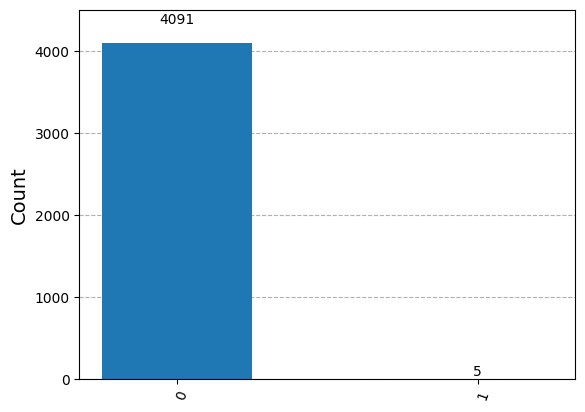

In [26]:
# I am generating and displaying a histogram of the execution outcomes
# classical_data.get_counts() method is used to 
# measure the data in the classical bit 'c'

# By default, the no. of trials is 4096 in sampler.
plot_histogram(classical_data.get_counts()) 

***Fig 02 : Measured state Vs Counts***

The histogram represents the probability of measuring the output state when my quantum circuit runs on the simulator.

In the above histogram :
- The **x-axis** represents the measured state.
- The **y-axis** represents the number of times each state was measured. By default, it is 4096 times.

Here, there is 0 and 1 on x-axis, which means that the measurement found the qubit in |0⟩ state as well as |1>. The qubit remained in the |0> state in majority of trials i.e. in 4091 trials. The qubit was also found in the |1> state in only 5 trials. This is in accordance with our horizontal experimental setup.